In [1]:
# get some libraries that will be useful
import re
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import string
import matplotlib.pyplot as plt
import pandas_datareader as dr
#To remove weekends from dataset
from pandas.tseries.offsets import BDay

# necessary libraries for wordcloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image

#to plot our candlestick
import plotly.graph_objects as go

# the Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
# function to split the data for cross-validation
from sklearn.model_selection import train_test_split
# function for transforming documents into counts
from sklearn.feature_extraction.text import CountVectorizer
# function for encoding categories
from sklearn.preprocessing import LabelEncoder


%matplotlib inline

C:\Users\PC\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# grab the data #we will first grab the news data set first
combined_news = pd.read_csv("../data/final_dataframe.csv")

In [3]:
# let's take a look at our data
combined_news.columns

Index(['Date', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8',
       'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16',
       'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23', 'Top24',
       'Top25', 'upordown'],
      dtype='object')

In [4]:
combined_news.head() #Date Range: 2008-06-08 to 2016-07-01 
#We would need to drop the label as we are comparing the headlines against VIX

Date                                               Top1  \
0  2008-08-08  b"Georgia 'downs two Russian warplanes' as cou...   
1  2008-08-11  b'Why wont America and Nato help us? If they w...   
2  2008-08-12  b'Remember that adorable 9-year-old who sang a...   
3  2008-08-13  b' U.S. refuses Israel weapons to attack Iran:...   
4  2008-08-14  b'All the experts admit that we should legalis...   

                                                Top2  \
0            b'BREAKING: Musharraf to be impeached.'   
1        b'Bush puts foot down on Georgian conflict'   
2                 b"Russia 'ends Georgia operation'"   
3  b"When the president ordered to attack Tskhinv...   
4  b'War in South Osetia - 89 pictures made by a ...   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   
1  b"Jewish Georgian minister: Thanks to Israeli ...   
2  b'"If we had no sexual harassment we would hav...   
3  b' Israel clears troops who killed Reuters cam...   
4  b'Swedish wrestler Ara Abrahamian throws away ...   

                                                Top4  \
0  b'Russian tanks are moving towards the capital...   
1  b'Georgian army flees in disarray as Russians ...   
2  b"Al-Qa'eda is losing support in Iraq because ...   
3  b'Britain\'s policy of being tough on drugs is...   
4  b'Russia exaggerated the death toll in South O...   

                                                Top5  \
0  b"Afghan children raped with 'impunity,' U.N. ...   
1      b"Olympic opening ceremony fireworks 'faked'"   
2  b'Ceasefire in Georgia: Putin Outmaneuvers the...   
3  b'Body of 14 year old found in trunk; Latest (...   
4  b'Missile That Killed 9 Inside Pakistan May Ha...   

                                                Top6  \
0  b'150 Russian tanks have entered South Ossetia...   
1  b'What were the Mossad with fraudulent New Zea...   
2  b'Why Microsoft and Intel tried to kill the XO...   
3  b'China has moved 10 *million* quake survivors...   
4  b"Rushdie Condemns Random House's Refusal to P...   

                                                Top7  \
0  b"Breaking: Georgia invades South Ossetia, Rus...   
1  b'Russia angered by Israeli military sale to G...   
2  b'Stratfor: The Russo-Georgian War and the Bal...   
3  b"Bush announces Operation Get All Up In Russi...   
4  b'Poland and US agree to missle defense deal. ...   

                                                Top8  \
0  b"The 'enemy combatent' trials are nothing but...   
1  b'An American citizen living in S.Ossetia blam...   
2  b"I'm Trying to Get a Sense of This Whole Geor...   
3             b'Russian forces sink Georgian ships '   
4  b'Will the Russians conquer Tblisi? Bet on it,...   

                                                Top9  ...  \
0  b'Georgian troops retreat from S. Osettain cap...  ...   
1  b'Welcome To World War IV! Now In High Definit...  ...   
2  b"The US military was surprised by the timing ...  ...   
3  b"The commander of a Navy air reconnaissance s...  ...   
4  b'Russia exaggerating South Ossetian death tol...  ...   

                                               Top17  \
0                b'Al-Qaeda Faces Islamist Backlash'   
1  b'"Do not believe TV, neither Russian nor Geor...   
2       b'Why Russias response to Georgia was right'   
3  b'US humanitarian missions soon in Georgia - i...   
4  b"Georgia confict could set back Russia's US r...   

                                               Top18  \
0  b'Condoleezza Rice: "The US would not act to p...   
1  b'Riots are still going on in Montreal (Canada...   
2  b'Gorbachev accuses U.S. of making a "serious ...   
3             b"Georgia's DDOS came from US sources"   
4  b'War in the Caucasus is as much the product o...   

                                               Top19  \
0  b'This is a busy day:  The European Union has ...   
1    b'China to overtake US as largest manufacturer'   
2         b'Russia, Georgia, and

In [5]:
#check that there are null values on Top 23 and top 24 and top 25.
combined_news.isnull().sum() 

Date        0
Top1        0
Top2        0
Top3        0
Top4        0
Top5        0
Top6        0
Top7        0
Top8        0
Top9        0
Top10       0
Top11       0
Top12       0
Top13       0
Top14       0
Top15       0
Top16       0
Top17       0
Top18       0
Top19       0
Top20       0
Top21       0
Top22       0
Top23       1
Top24       3
Top25       3
upordown    0
dtype: int64

# Perform EDA on the distribution of the news headlines 

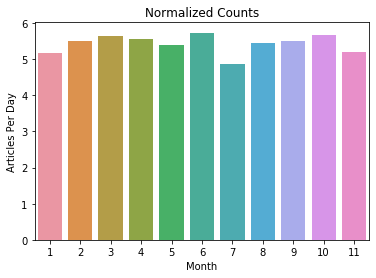

In [6]:
#change format to date time for EDA
combined_news['Date'] = combined_news['Date'].astype('datetime64[ns]')
#Create column MONTH and DAY for EDA
combined_news['MONTH'] = combined_news['Date'].apply(lambda Date: Date.month)
combined_news['DAY'] = combined_news['Date'].apply(lambda Date: Date.day)
# Some months have 30 and others have 30 days. The first and last months in our dataset and not whole.
month_days = {
    1: 31,
    2: 28,
    3: 31,
    4: 30,
    5: 31,
    6: 30,
    7: 31,
    8: 31,
    9: 30,
    10:31,
    11:31
}

articles_per_day = {}
for month in month_days:
    n_articles = len(combined_news[combined_news['MONTH'] == month])
    articles_per_day[month] = n_articles / month_days[month]

ax = sns.barplot(x=list(articles_per_day.keys()), y=list(articles_per_day.values()))
ax.set_title("Normalized Counts")
ax.set_xlabel("Month")
ax.set_ylabel("Articles Per Day")
plt.show()

## We can see that the distribution of the data from 2008 to 2016 till august seems to be evenly balanced across the month.

## Lets create a WORDCLOUD to see the most number of words for each of the year 2008 to 2016.

In [7]:
# we want to create a new column to combine all headlines for top 25 for purpose of wordcloud
combined_news['all25'] = combined_news[combined_news.columns[1:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
#we create a year column as we want to see what are the top words used for each of the year 2008 to 2016
combined_news['YEAR'] = combined_news['Date'].apply(lambda Date: Date.year)

In [8]:
combined_news.head()

Date                                               Top1  \
0 2008-08-08  b"Georgia 'downs two Russian warplanes' as cou...   
1 2008-08-11  b'Why wont America and Nato help us? If they w...   
2 2008-08-12  b'Remember that adorable 9-year-old who sang a...   
3 2008-08-13  b' U.S. refuses Israel weapons to attack Iran:...   
4 2008-08-14  b'All the experts admit that we should legalis...   

                                                Top2  \
0            b'BREAKING: Musharraf to be impeached.'   
1        b'Bush puts foot down on Georgian conflict'   
2                 b"Russia 'ends Georgia operation'"   
3  b"When the president ordered to attack Tskhinv...   
4  b'War in South Osetia - 89 pictures made by a ...   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   
1  b"Jewish Georgian minister: Thanks to Israeli ...   
2  b'"If we had no sexual harassment we would hav...   
3  b' Israel clears troops who killed Reuters cam...   
4  b'Swedish wrestler Ara Abrahamian throws away ...   

                                                Top4  \
0  b'Russian tanks are moving towards the capital...   
1  b'Georgian army flees in disarray as Russians ...   
2  b"Al-Qa'eda is losing support in Iraq because ...   
3  b'Britain\'s policy of being tough on drugs is...   
4  b'Russia exaggerated the death toll in South O...   

                                                Top5  \
0  b"Afghan children raped with 'impunity,' U.N. ...   
1      b"Olympic opening ceremony fireworks 'faked'"   
2  b'Ceasefire in Georgia: Putin Outmaneuvers the...   
3  b'Body of 14 year old found in trunk; Latest (...   
4  b'Missile That Killed 9 Inside Pakistan May Ha...   

                                                Top6  \
0  b'150 Russian tanks have entered South Ossetia...   
1  b'What were the Mossad with fraudulent New Zea...   
2  b'Why Microsoft and Intel tried to kill the XO...   
3  b'China has moved 10 *million* quake survivors...   
4  b"Rushdie Condemns Random House's Refusal to P...   

                                                Top7  \
0  b"Breaking: Georgia invades South Ossetia, Rus...   
1  b'Russia angered by Israeli military sale to G...   
2  b'Stratfor: The Russo-Georgian War and the Bal...   
3  b"Bush announces Operation Get All Up In Russi...   
4  b'Poland and US agree to missle defense deal. ...   

                                                Top8  \
0  b"The 'enemy combatent' trials are nothing but...   
1  b'An American citizen living in S.Ossetia blam...   
2  b"I'm Trying to Get a Sense of This Whole Geor...   
3             b'Russian forces sink Georgian ships '   
4  b'Will the Russians conquer Tblisi? Bet on it,...   

                                                Top9  ...  \
0  b'Georgian troops retreat from S. Osettain cap...  ...   
1  b'Welcome To World War IV! Now In High Definit...  ...   
2  b"The US military was surprised by the timing ...  ...   
3  b"The commander of a Navy air reconnaissance s...  ...   
4  b'Russia exaggerating South Ossetian death tol...  ...   

                                               Top21  \
0  b'Why the Pentagon Thinks Attacking Iran is a ...   
1  b'Israeli Physicians Group Condemns State Tort...   
2          b'War in Georgia: The Israeli connection'   
3                     b'Gorbachev: We Had No Choice'   
4  b'Saudi Arabia: Mother moves to block child ma...   

                                               Top22  \
0  b'Caucasus in crisis: Georgia invades South Os...   
1  b' Russia has just beaten the United States ov...   
2  b'All signs point to the US encouraging Georgi...   
3  b'Witness: Russian forces head towards Tbilisi...   
4   b'Taliban wages war on humanitarian aid workers'   

                                               Top23  \
0  b'Indian shoe manufactory  - And again in a se...   
1  b'Perhaps *the* question about the Georgia - R...   
2  b'Christopher King argues that the

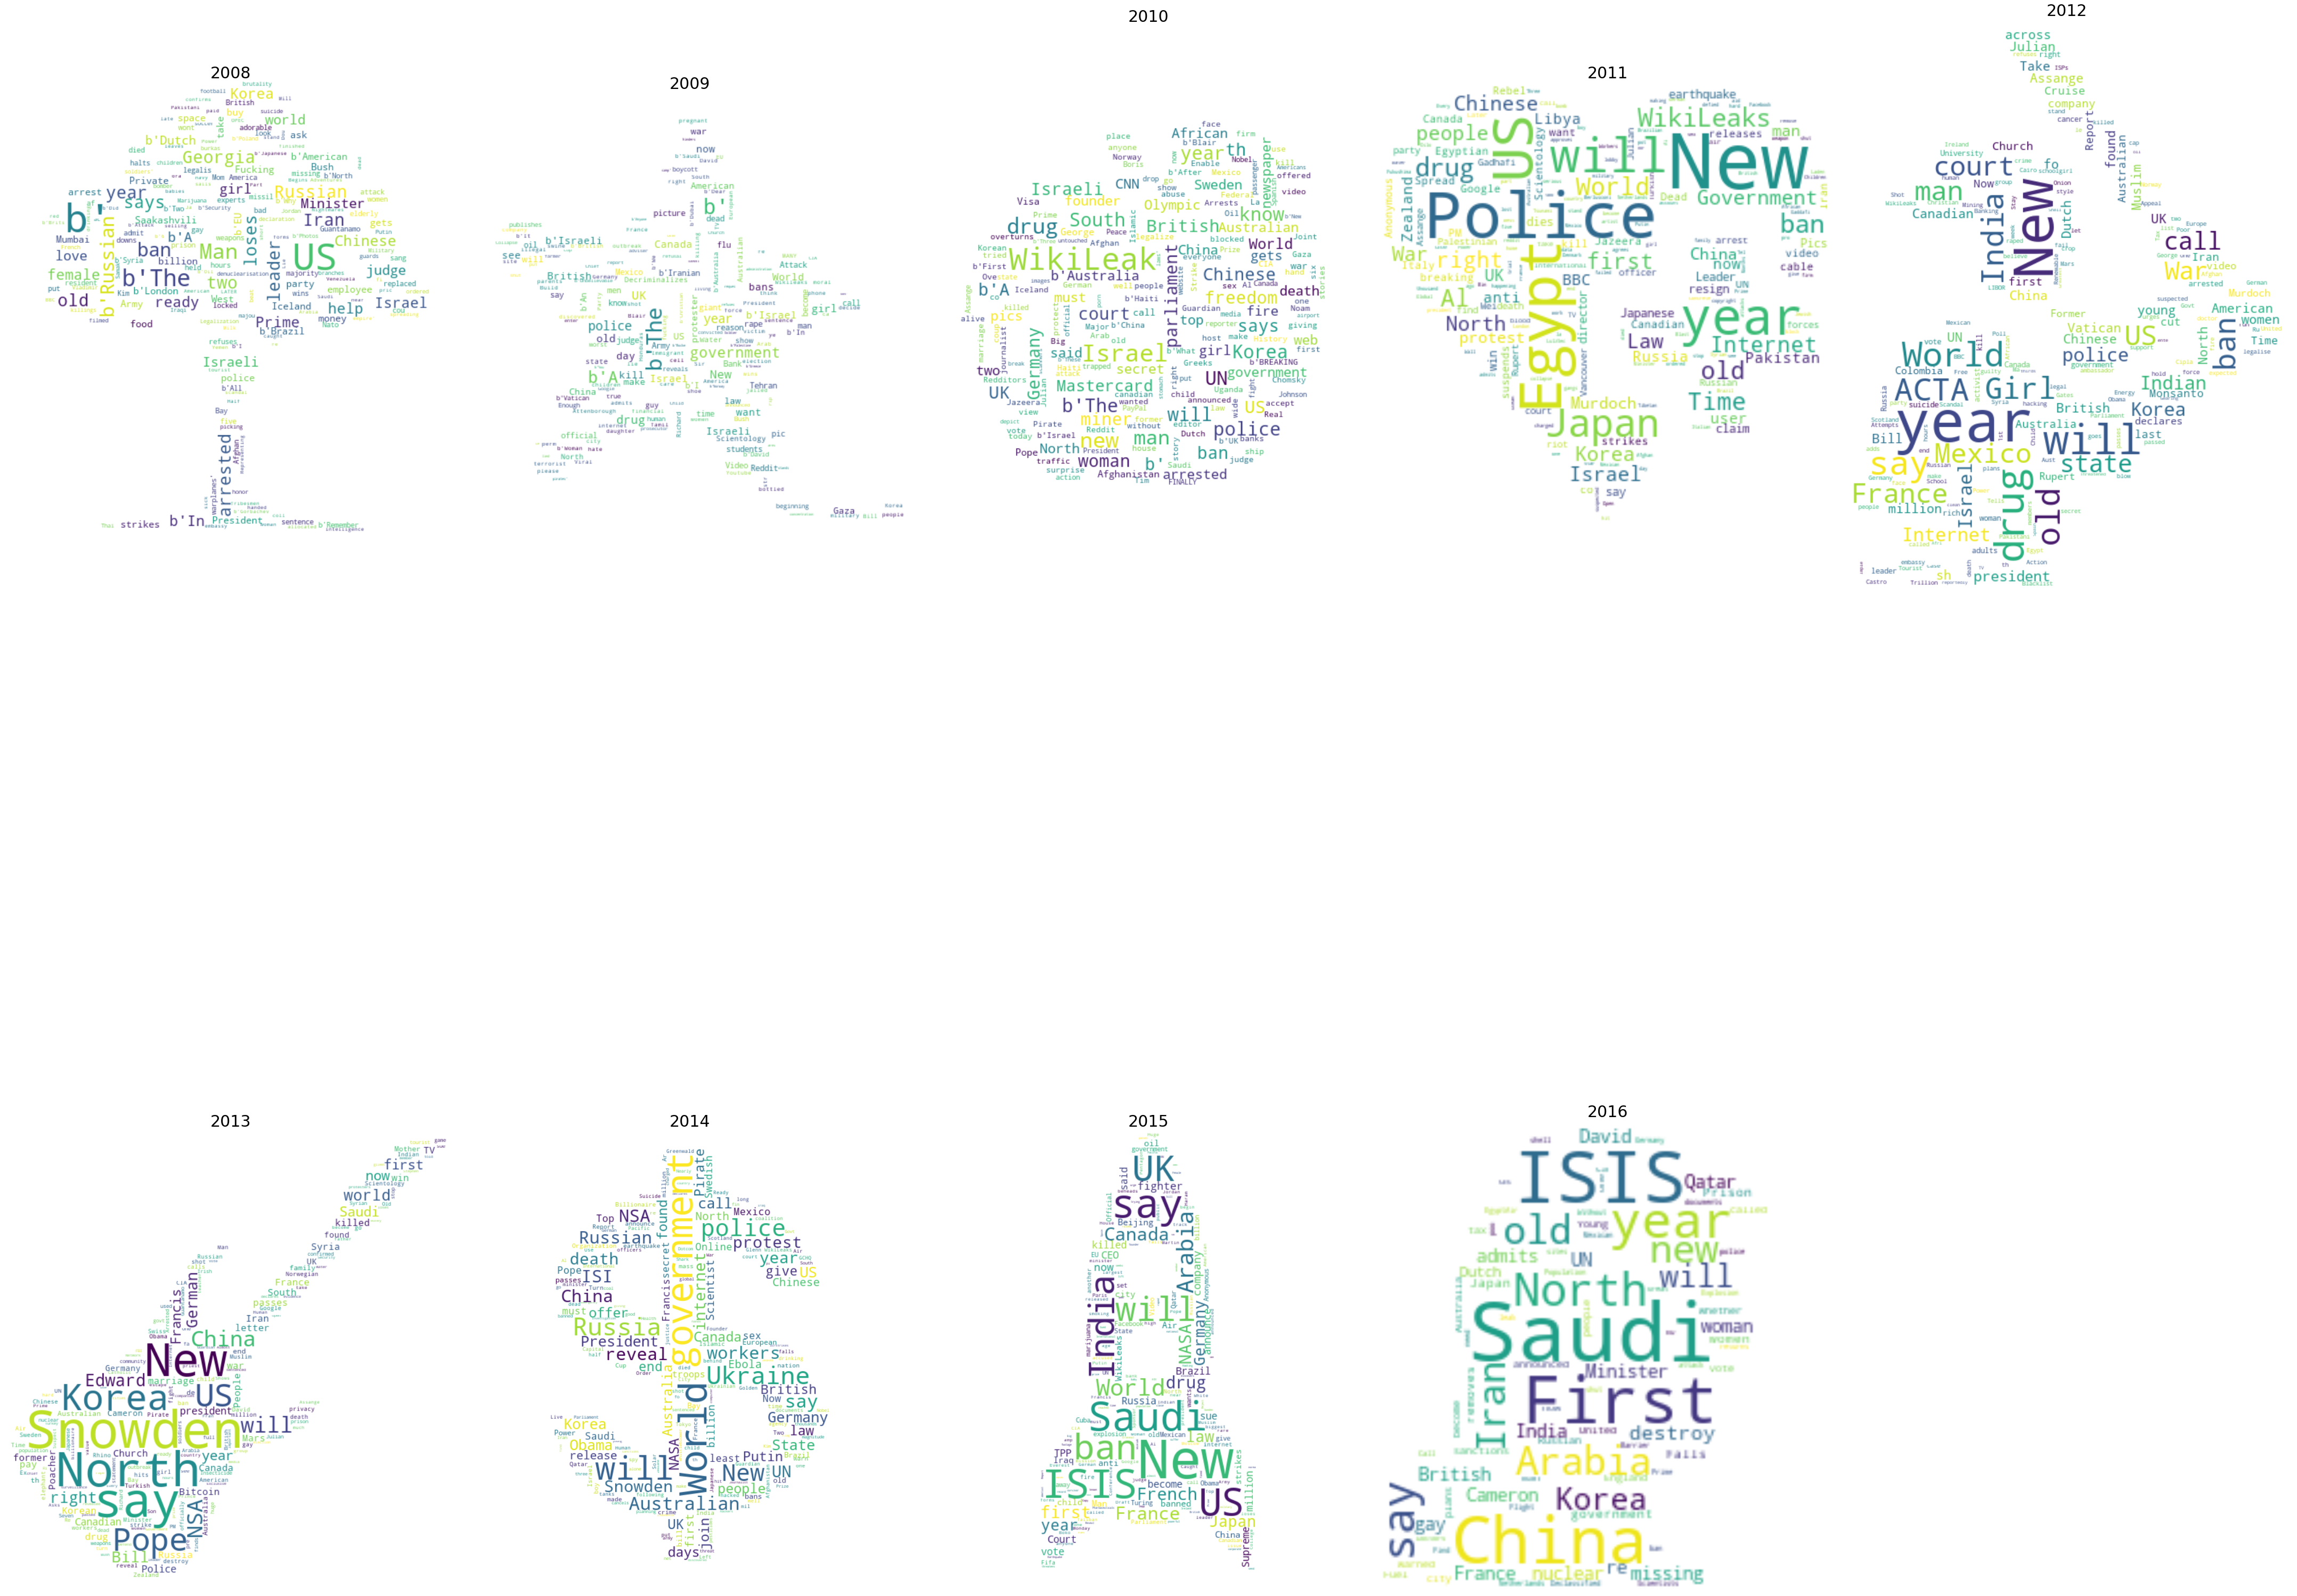

In [9]:
# create dataframe for each category 2008,2009,2010,2011,2012,2013,2014,2015,2016
news_2008 = combined_news[combined_news.YEAR == 2008]  # year 2008
news_2009 = combined_news[combined_news.YEAR == 2009]  # year 2009
news_2010 = combined_news[combined_news.YEAR == 2010]  # year 2010
news_2011 = combined_news[combined_news.YEAR == 2011]  # year 2011
news_2012 = combined_news[combined_news.YEAR == 2012]  # year 2012
news_2013 = combined_news[combined_news.YEAR == 2013]  # year 2013
news_2014 = combined_news[combined_news.YEAR == 2014]  # year 2014
news_2015 = combined_news[combined_news.YEAR == 2015]  # year 2015
news_2016 = combined_news[combined_news.YEAR == 2016]  # year 2016

# convert news titles to usable strings for the word clouds
title_2008 = news_2008['all25'].to_string()  # year 2008
title_2009 = news_2009['all25'].to_string()  # year 2009
title_2010 = news_2010['all25'].to_string()  # year 2010
title_2011 = news_2011['all25'].to_string()  # year 2011
title_2012 = news_2012['all25'].to_string()  # year 2012
title_2013 = news_2013['all25'].to_string()  # year 2013
title_2014 = news_2014['all25'].to_string()  # year 2014
title_2015 = news_2015['all25'].to_string()  # year 2015
title_2016 = news_2016['all25'].to_string()  # year 2016

# import images and make them usable by word cloud

image_2008 = np.array(Image.open('../images/tree.jpg'))# year 2008
image_2009 = np.array(Image.open('../images/star.jpg'))# year 2009
image_2010 = np.array(Image.open('../images/apple.jpg'))# year 2010
image_2011 = np.array(Image.open('../images/health.jpg'))# year 2011
image_2012 = np.array(Image.open('../images/baseball.png'))# year 2012
image_2013 = np.array(Image.open('../images/entertainment.jpg'))# year 2013
image_2014 = np.array(Image.open('../images/business.jpg'))# year 2014
image_2015 = np.array(Image.open('../images/scitech.jpg'))# year 2015
image_2016 = np.array(Image.open('../images/trump.jfif'))# year 2016

# setting stop-words, so words like "the" and "it" are ignored
stopwords = set(STOPWORDS)

#define fig

fig = plt.figure(figsize=(60,60))

# 2008  news cloud
ax1 = fig.add_subplot(251)
wordcloud_2008 = WordCloud(background_color='white', mask=image_2008, collocations=False, stopwords=stopwords).generate(title_2008)
ax1.imshow(wordcloud_2008, interpolation='bilinear')
ax1.set_title('2008', size=30)
ax1.axis('off')

# 2009  news cloud
ax2 = fig.add_subplot(252)
wordcloud_2009 = WordCloud(background_color='white', mask=image_2009, collocations=False, stopwords=stopwords).generate(title_2009)
ax2.imshow(wordcloud_2009, interpolation='bilinear')
ax2.set_title('2009', size=30)
ax2.axis('off')

# 2010  news cloud
ax3 = fig.add_subplot(253)
wordcloud_2010 = WordCloud(background_color='white', mask=image_2010, collocations=False, stopwords=stopwords).generate(title_2010)
ax3.imshow(wordcloud_2010, interpolation='bilinear')
ax3.set_title('2010', size=30)
ax3.axis('off')

# 2011  news cloud
ax4 = fig.add_subplot(254)
wordcloud_2011 = WordCloud(background_color='white', mask=image_2011, collocations=False, stopwords=stopwords).generate(title_2011)
ax4.imshow(wordcloud_2011, interpolation='bilinear')
ax4.set_title('2011', size=30)
ax4.axis('off')

#2012  news cloud
ax5 = fig.add_subplot(255)
wordcloud_2012 = WordCloud(background_color='white', mask=image_2012, collocations=False, stopwords=stopwords).generate(title_2012)
ax5.imshow(wordcloud_2012, interpolation='bilinear')
ax5.set_title('2012', size=30)
ax5.axis('off')

# 2013  news cloud
ax6 = fig.add_subplot(256)
wordcloud_2013 = WordCloud(background_color='white', mask=image_2013, collocations=False, stopwords=stopwords).generate(title_2013)
ax6.imshow(wordcloud_2013, interpolation='bilinear')
ax6.set_title('2013', size=30)
ax6.axis('off')

# 2014 news cloud
ax7 = fig.add_subplot(257)
wordcloud_2014 = WordCloud(background_color='white', mask=image_2014, collocations=False, stopwords=stopwords).generate(title_2014)
ax7.imshow(wordcloud_2014, interpolation='bilinear')
ax7.set_title('2014', size=30)
ax7.axis('off')

# 2015 news cloud
ax8 = fig.add_subplot(258)
wordcloud_2015 = WordCloud(background_color='white', mask=image_2015, collocations=False, stopwords=stopwords).generate(title_2015)
ax8.imshow(wordcloud_2015, interpolation='bilinear')
ax8.set_title('2015', size=30)
ax8.axis('off')

# 2016 news cloud
ax9 = fig.add_subplot(259)
wordcloud_2016 = WordCloud(background_color='white', mask=image_2016, collocations=False, stopwords=stopwords).generate(title_2016)
ax9.imshow(wordcloud_2016, interpolation='bilinear')
ax9.set_title('2016', size=30)
ax9.axis('off')

#plotting the figure of the word cloud
fig.tight_layout();

Some of the most common words appearing in news headlines for each of the year are:

2008 : 

2009 :

2010 : 

2011 :

2012 :

2013 :

2014 :

2015 :

2016 : 

# Lets also have a look at our price movements for during this period of the dataset

In [10]:
# Lets take a look at the chart of the candlesticks (Y variables)

### Our aim is to assign value 1 if candle is green and 0 if candle is red.

In [11]:
#Dataset consist of Y Variable(VIX PRICE) from 2004 to 2020
price = pd.read_csv("../data/vix_price.csv") 

In [12]:
price.head()

Date  VIX Open  VIX High  VIX Low  VIX Close
0   8/8/2008     21.15     21.69    20.11      20.66
1  8/11/2008     20.66     20.96    19.66      20.12
2  8/12/2008     20.64     21.51    20.38      21.17
3  8/13/2008     21.57     22.11    20.80      21.55
4  8/14/2008     22.30     22.30    20.07      20.34

In [13]:
fig = go.Figure(data=[go.Candlestick(x=price['Date'],
                open=price['VIX Open'], high=price['VIX High'],
                low=price['VIX Low'], close=price['VIX Close'])
                     ])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [14]:
fig = go.Figure(data=[go.Candlestick(x=price['Date'],
                open=price['VIX Open'],
                high=price['VIX High'],
                low=price['VIX Low'],
                close=price['VIX Close'])])
fig.show()

In [15]:
#To check if there is no difference in closing and opening price.

#create a new column for the difference in the Closing and Opening Price
price['upordown'] = price['VIX Close'] - price['VIX Open']
#if closing price is higher then opening price, will assign value 1
price['upordown'] = np.where(price['upordown'] > 0,1, price['upordown'])
#if closing price is equal to opening price, will assign value 0
price['upordown'] = np.where(price['upordown'] == 0 ,0, price['upordown'])
#if closing price is lower then opening price, will assign value 0
price['upordown'] = np.where(price['upordown'] < 0,0, price['upordown'])

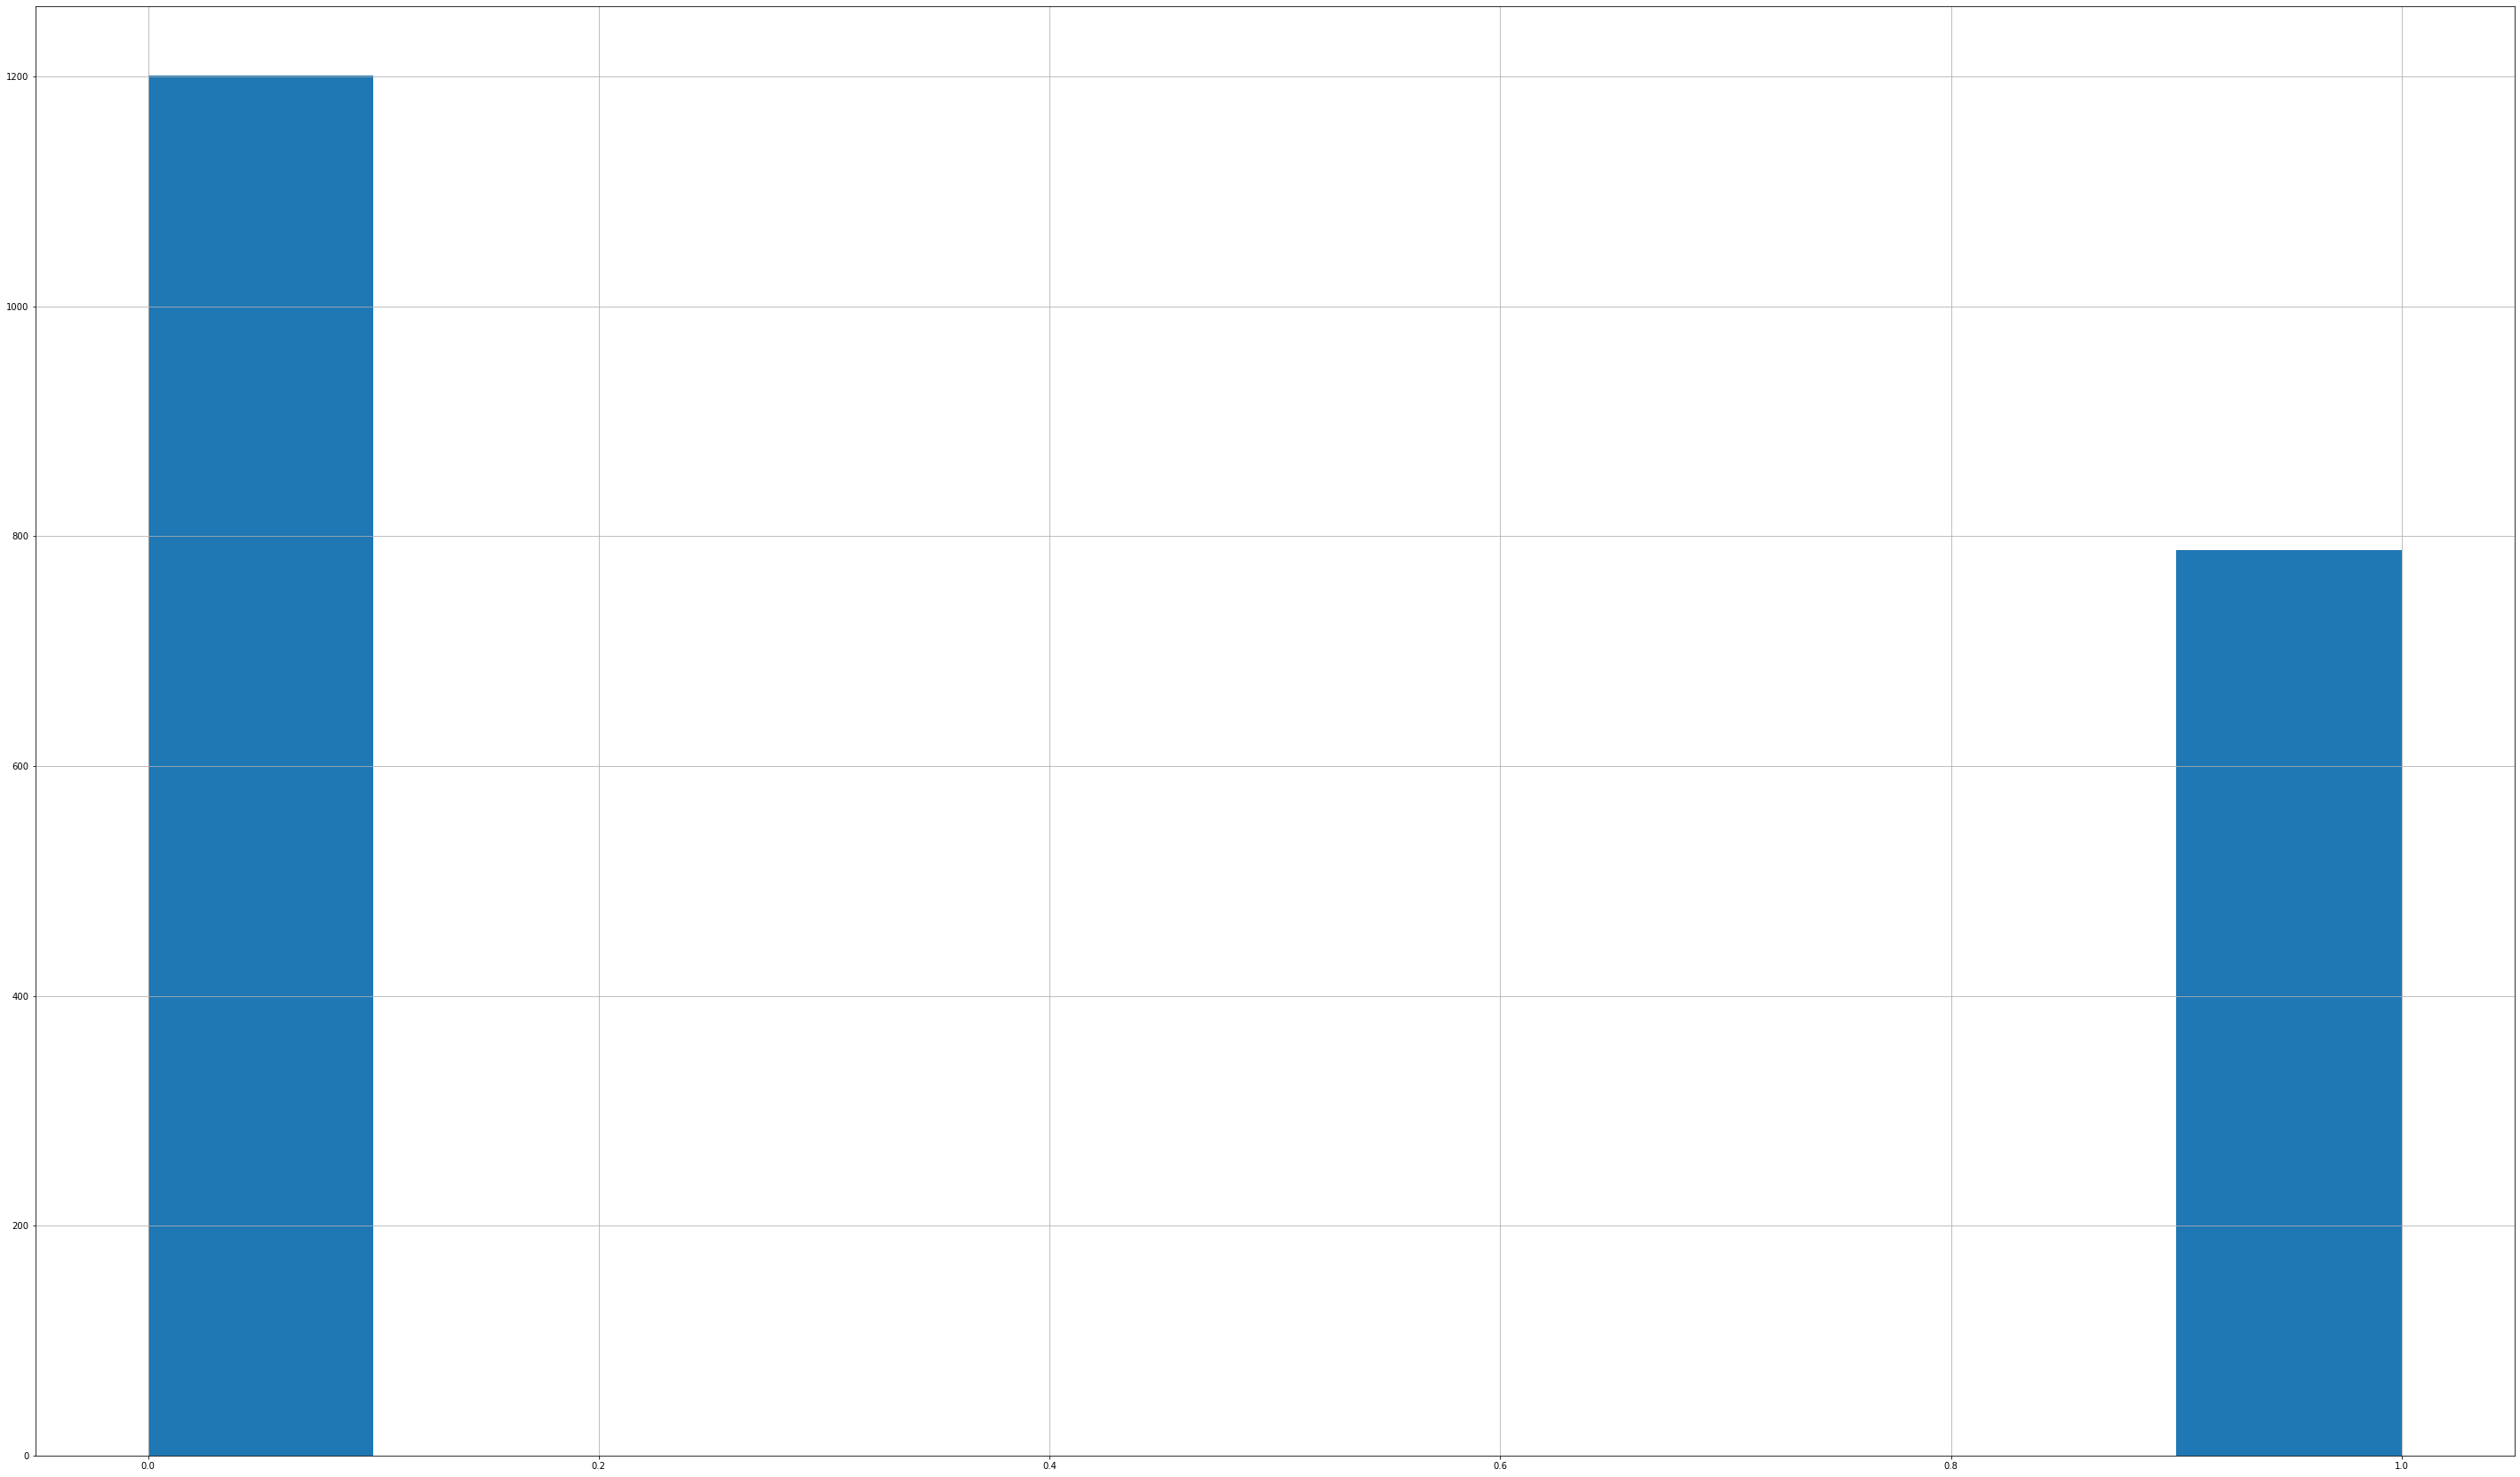

In [16]:
price['upordown'].hist(figsize=(50, 30));

In [17]:
#this is our Y variable.
price['upordown'].value_counts(normalize= True)

0.0    0.603821
1.0    0.396179
Name: upordown, dtype: float64

We can see that days where :

closing price for vix < opening price consist of 59%.

closing price for vix > opening price consist of 39%.

closing price for vix = opening price is 0.4%.

# Please proceed to Feature Engineering part 3